In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Define dataset path
dataset_path = "./Dataset_updated/"

# Load dataset
batch_size = 32
img_size = (224, 224)

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Class names
class_names = train_ds.class_names
print("Classes:", class_names)

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Classes: ['Crash', 'No Crash']


In [3]:
# Load pre-trained MobileNetV2 model (without top layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps into a vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dense(64, activation="relu")(x)
output_layer = Dense(1, activation="sigmoid", name="output")(x)  # Fixed Output Layer

# Create model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

In [4]:
# Train the model
epochs = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 569ms/step - accuracy: 0.4830 - loss: 0.7486 - val_accuracy: 0.8900 - val_loss: 0.3674
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 470ms/step - accuracy: 0.8984 - loss: 0.3382 - val_accuracy: 0.8900 - val_loss: 0.3696
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 458ms/step - accuracy: 0.8917 - loss: 0.3445 - val_accuracy: 0.8900 - val_loss: 0.3440
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.8945 - loss: 0.3246 - val_accuracy: 0.8900 - val_loss: 0.3322
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.8859 - loss: 0.3221 - val_accuracy: 0.8900 - val_loss: 0.3196
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.9076 - loss: 0.2802 - val_accuracy: 0.8900 - val_loss: 0.3108
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.8593 - loss: 0.3604 - val_accuracy: 0.8900 - val_loss: 0.3004
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.8991 - loss: 0.2743 - val_accuracy: 0

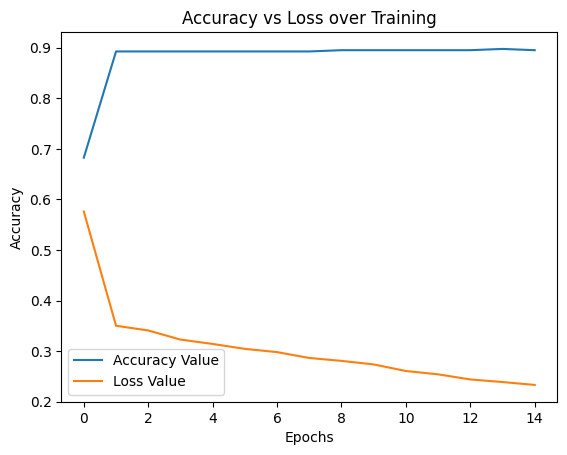

In [5]:
# Plot training history
plt.plot(history.history["accuracy"], label="Accuracy Value")
plt.plot(history.history["loss"], label="Loss Value")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Loss over Training")
plt.show()

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(val_ds)
print()
print(f"Validation Accuracy: {accuracy*100:.04f} %")

# Save the model
model.save("crash_detection_mobilenetv2.h5")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.8893 - loss: 0.2571



Validation Accuracy: 89.0000 %
